# K Means Clustering Applications

In this notebook, I give you a several basic applications of K Means Clustering algorithm (clustering in general)

In [35]:
%matplotlib notebook

from k_means import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import time

## Simple Customer Segmentation

In [36]:
df = pd.read_csv('example_datasets/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<IPython.core.display.Javascript object>


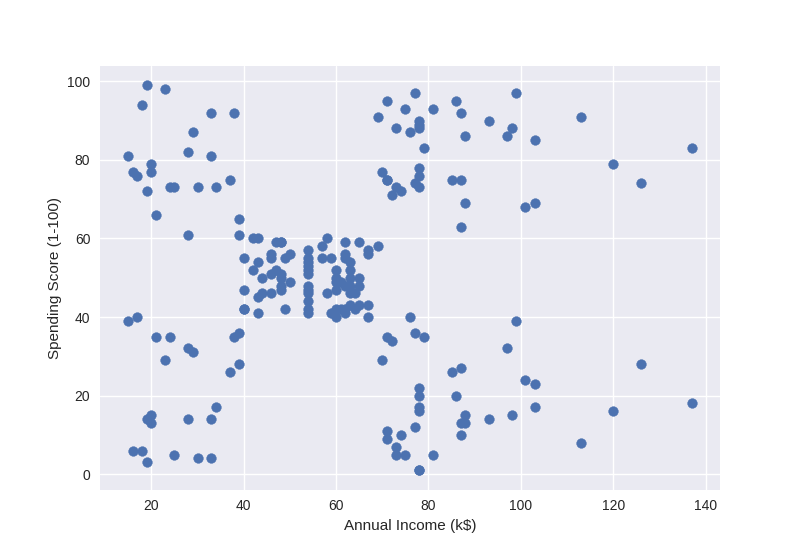

Text(0, 0.5, 'Spending Score (1-100)')

In [9]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [10]:
model = KMeans(max_iter = 500, tolerance = 0.001, n_clusters = 5, runs = 500)
(clusters, data_with_clusters) = model.fit(X)

In [11]:
model.cost_

2602.972578838644

<IPython.core.display.Javascript object>


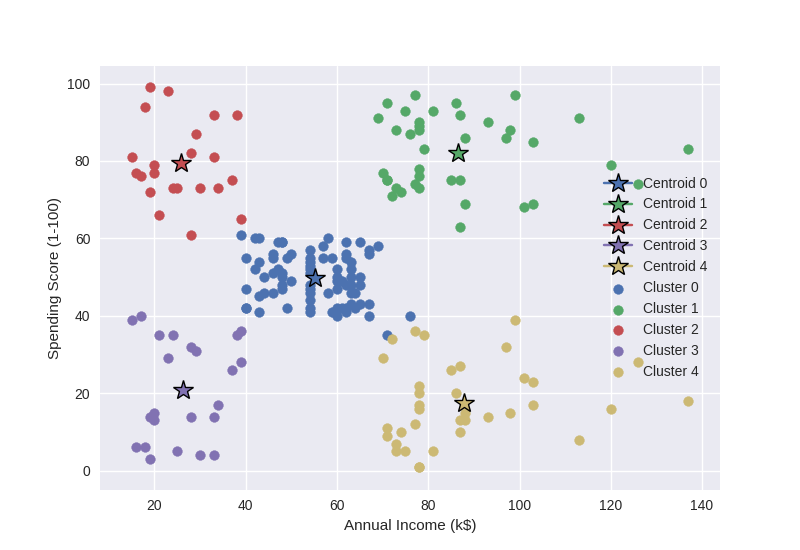

In [12]:
plt.close()
for i, cluster_mean in enumerate(clusters):
    data_cluster_i = data_with_clusters[ data_with_clusters[:, -1] == i ]
    plt.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], label = 'Cluster ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.style.use('seaborn')
    plt.legend()

## Searching for optimum K by Elbow Method

Text(0, 0.5, 'Cost')

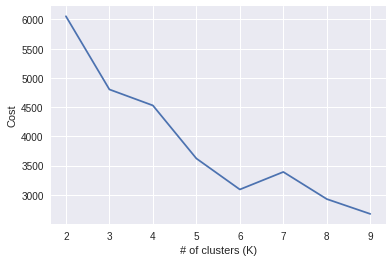

In [27]:
costs = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    costs.append(model.cost_)
    

plt.close()
plt.plot(list(range(2, 10)), costs)
plt.xlabel("# of clusters (K)")
plt.ylabel("Cost")

## Image Compression by K Means Clustering

### With OpenCV

In [16]:

cat_img_orig = cv2.imread('example_datasets/sleeping_cats.jpg')

cat_img_orig = cv2.cvtColor(cat_img_orig, cv2.COLOR_BGR2RGB)
cat_img_shape = cat_img_orig.shape
# Convert 3d image array to 2d array
cat_img_orig = cat_img_orig / 255
cat_img = cat_img_orig.reshape(-1, 3)

cat_img_shape

(423, 640, 3)

In [17]:
model = KMeans(n_clusters=16)

cluster_means, image_data_with_clusters = model.fit(cat_img)

In [18]:
compressed_image = np.zeros(cat_img.shape)

## Assigning each pixel color to its corresponding cluster centroid
for i, cluster in enumerate(image_data_with_clusters[:, -1]):
    compressed_image[i, :] = cluster_means[ int(cluster) ]

In [19]:
compressed_image.shape

(270720, 3)

In [20]:
compressed_image_reshaped = compressed_image.reshape(cat_img_shape)

In [21]:
compressed_image_reshaped.shape

(423, 640, 3)

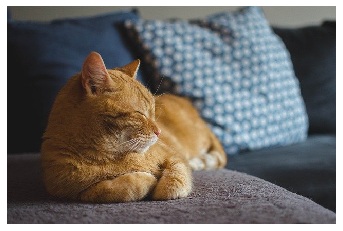

In [22]:
%matplotlib inline
plt.close()
plt.axis('off')
plt.imshow(cat_img_orig)

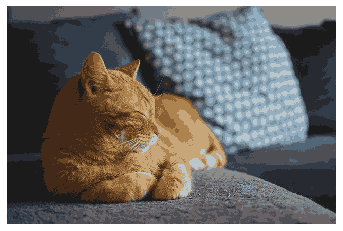

In [23]:
plt.close()
plt.axis('off')
plt.imshow(compressed_image_reshaped)

### With scikit-image

I used scikit-image because openCV was ridiculously increasing the file size, even though I only read the image into matrix and writing to a file again.

In [24]:
def compress_by_k_means(image_name, compressed_image_name, n_clusters = 8):
    start = time.time()
    
    image = io.imread(image_name)
    orig_shape = image.shape
    image = image.reshape(-1, image.shape[2]) / 255 # Normalization. It improves the performance so much!
    img_shape = image.shape
    
    
    
    model = KMeans(n_clusters=n_clusters)

    cluster_means, image_data_with_clusters = model.fit(image)
    
    compressed_image = np.zeros(img_shape)

    for i, cluster in enumerate(image_data_with_clusters[:, -1]):
        compressed_image[i, :] = cluster_means[ int(cluster) ]
        
    compressed_image = compressed_image * 255
    compressed_image_reshaped = compressed_image.reshape(orig_shape).astype('uint8') # Can't write float type matrix to an image file
    io.imsave(compressed_image_name, compressed_image_reshaped)
    
    end = time.time()
    
    print('Compressed in', end-start, 'seconds') # Calculating the time elapsed while compressing the image. Depends on n_clusters and file size and also on the computer

In [34]:
compress_by_k_means('example_datasets/car.png', 'example_datasets/car_comp.png', n_clusters=8)

### Original Image: 221 kb. Compressed Image: 18 kb

Compressed in 0.8533275127410889 seconds


In [25]:
compress_by_k_means('example_datasets/karakoy.jpg', 'example_datasets/karakoy_comp.jpg', n_clusters=8)

### Original Image: 167 kb. Compressed Image: 125 kb

Compressed in 6.423376798629761 seconds


In [30]:
compress_by_k_means('example_datasets/dog.jpg', 'example_datasets/dog_comp.jpg', n_clusters=16)

## Original Image: 533 kb. Compressed Image: 412 kb

Compressed in 81.99637055397034 seconds


In [31]:
compress_by_k_means('example_datasets/wolf.jpg', 'example_datasets/wolf_comp.jpg', n_clusters=16)

## Original Image: 228 kb. Compressed Image: 183 kb

Compressed in 36.83865284919739 seconds


In [32]:
compress_by_k_means('example_datasets/rabbit.jpg', 'example_datasets/rabbit_comp.jpg', n_clusters=8)

### Original Image: 884 kb. Compressed Image: 689 kb

Compressed in 32.76959490776062 seconds
